Shape of the dataset: (200, 3)

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     190 non-null    float64
 1   Income  200 non-null    int64  
 2   Gender  200 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB
None

First few rows:
    Age  Income  Gender
0  56.0   11958  Female
1  46.0    7389    Male
2  32.0    5327  Female
3   NaN   11004    Male
4  38.0    5931  Female

Statistical summary:
              Age        Income
count  190.000000    200.000000
mean    38.794737   8895.935000
std     12.610358   3473.121571
min     18.000000   3098.000000
25%     28.000000   5926.000000
50%     40.000000   8827.500000
75%     50.000000  11765.500000
max     59.000000  14983.000000


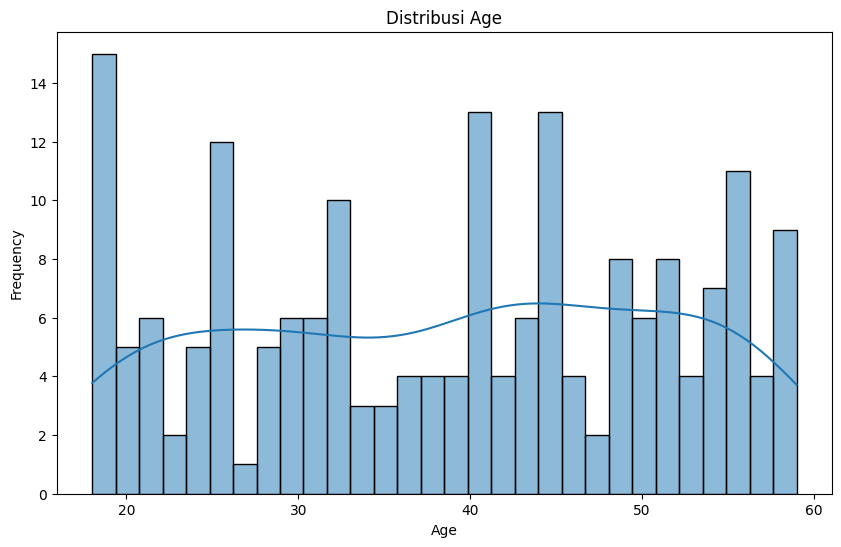

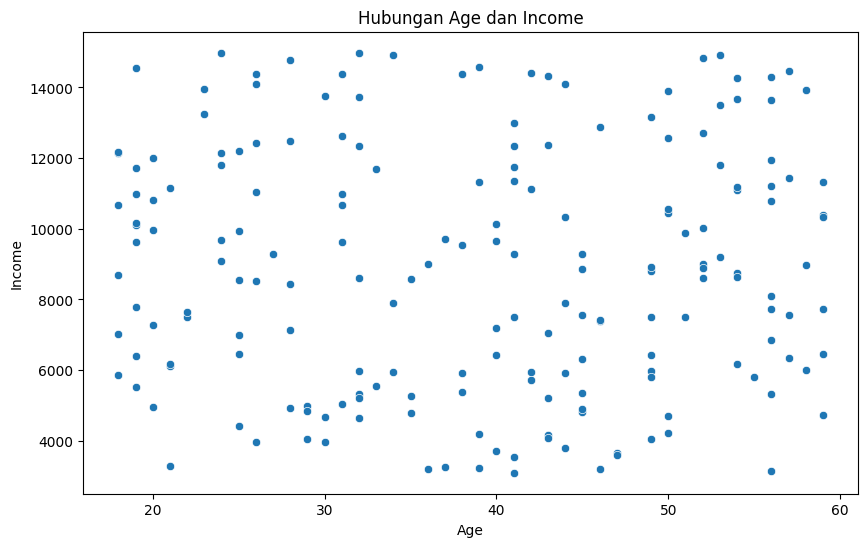

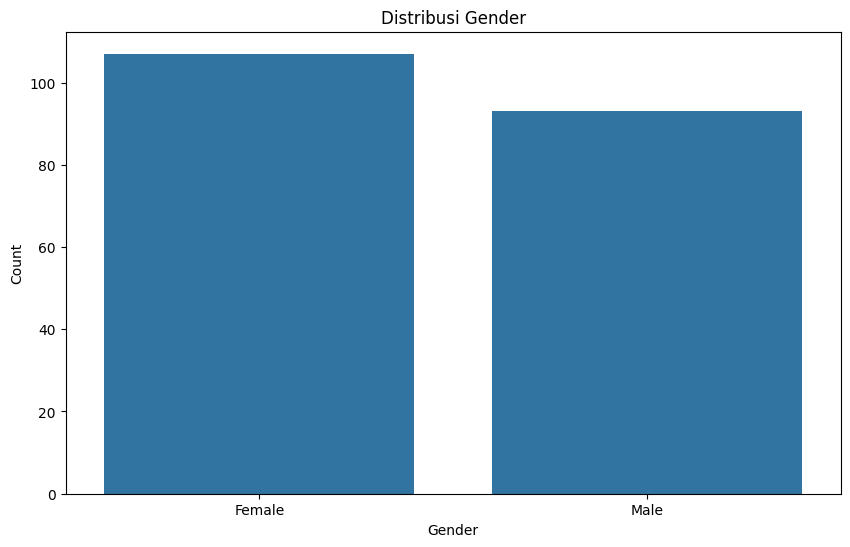


Correlation matrix:
             Age    Income
Age     1.000000 -0.010723
Income -0.010723  1.000000

Missing values per column:
Age       10
Income     0
Gender     0
dtype: int64


C:\Users\galan\AppData\Local\Temp\ipykernel_18576\3255818525.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


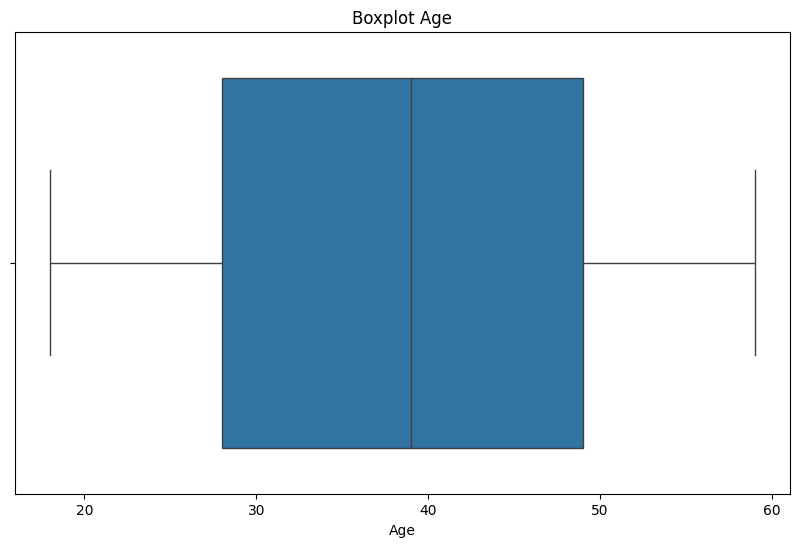


First few rows after preprocessing:
        Age    Income  Gender  Age_Income_Ratio
0  1.403518  0.883859  Female          1.587944
1  0.587769 -0.434974    Male         -1.351274
2 -0.554280 -1.030166  Female          0.538049
3  0.000000  0.608489    Male          0.000000
4 -0.064831 -0.855822  Female          0.075752


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Baca dataset
df = pd.read_csv('data.csv')

# Cek struktur data
print("Shape of the dataset:", df.shape)
print("\nInfo about the dataset:")
print(df.info())

# Cek data sekilas
print("\nFirst few rows:")
print(df.head())

# Statistik deskriptif
print("\nStatistical summary:")
print(df.describe())

# Visualisasi distribusi Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualisasi hubungan Age vs Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Hubungan Age dan Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Visualisasi distribusi Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Korelasi antar fitur numerik
print("\nCorrelation matrix:")
print(df.corr(numeric_only=True))

# Cek missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Imputasi missing values pada Age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Boxplot untuk deteksi outlier Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot Age')
plt.xlabel('Age')
plt.show()

# Normalisasi Age dan Income
scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

# Fitur baru: Age_Income_Ratio
df['Age_Income_Ratio'] = df['Age'] / df['Income']

# Tampilkan data hasil preprocessing
print("\nFirst few rows after preprocessing:")
print(df.head())


In [3]:
import pandas as pd
import numpy as np

# Set random seed biar hasilnya konsisten
np.random.seed(42)

# Buat dataset dummy
data = {
    'Age': np.random.randint(18, 60, 200),
    'Income': np.random.randint(3000, 15000, 200),
    'Gender': np.random.choice(['Male', 'Female'], 200)
}

# Buat DataFrame
df = pd.DataFrame(data)

# Tambahkan beberapa missing value secara acak ke kolom Age
missing_indices = np.random.choice(df.index, 10, replace=False)
df.loc[missing_indices, 'Age'] = np.nan

# Simpan ke CSV
df.to_csv('data.csv', index=False)

print("Dataset berhasil dibuat dan disimpan sebagai 'data.csv'.")
print(df.head())


Dataset berhasil dibuat dan disimpan sebagai 'data.csv'.
    Age  Income  Gender
0  56.0   11958  Female
1  46.0    7389    Male
2  32.0    5327  Female
3   NaN   11004    Male
4  38.0    5931  Female
